<a href="https://colab.research.google.com/github/Pragatheis/Breast-Cancer-Prediction-/blob/main/ML_Project_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Project - Fall 2021 CNIT 62300

## 1. Library

In [ ]:
import numpy as np  #  Numpy for Numerical Analysis
import pandas as pd # Pandas for Data (Pre)processing 
import os           # ??
import matplotlib.pyplot as plt # Matplotlib for Visualization (plot/graphs)
import seaborn as sns # Seaborn for Statistical graphics in Python 

pd.options.display.max_columns = 100

# 2. Data Import

In [ ]:
bc_data = pd.read_csv("./data.csv") # Dataset (CSV) uploaded to the Google Colab 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 3. Exploring Data, Attributes and Parameters


In [ ]:
# Total number of Rows and Columns in the Dataset 
len(bc_data.index), len(bc_data.columns)
bc_data.shape

(569, 33)

In [ ]:
bc_data.info() # Quick view at the structure of the Breast Cancer Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
bc_data.head() # Top 5 elements in the Dataset [Row 0 to Row 4]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bc_data.tail()  # Last 5 elements in the Dataset [Row 564 to Row 568]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
# important Step ***
bc_data.isna().any() # isna() function for detecting missing values

# We found NO missing values

In [ ]:
bc_data.isna().sum() # isna(). sum() to returns the number of missing values in each column

# Since there are no missing data, thus all the outcomes for this fucntion is Zero (0)

In [ ]:
bc_data = bc_data.dropna(axis='columns') #dropna() function to remove rows and columns with Null/NaN values

# Since we don't have any NULL/NaN elements then 

## Raja - Do we need this? Missing Vs. NaN

In [ ]:
bc_data.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
bc_data.diagnosis.value_counts() #unique values

B    357
M    212
Name: diagnosis, dtype: int64

### Identify dependent and independent

In [ ]:
bc_data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
##diagnosis_unique = data.diagnosis.unique()

In [ ]:
##diagnosis_unique

# 4. VISUALIZATON

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



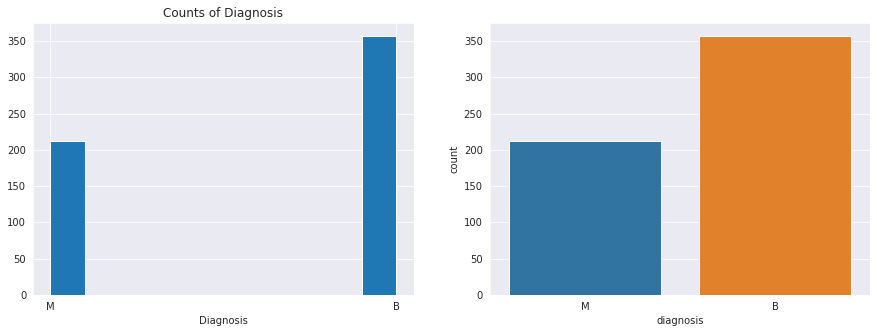

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(bc_data.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot('diagnosis', data=bc_data); # ";" to remove output like this > <matplotlib.axes._subplots.AxesSubplot at 0x7f3a1dddba50>

# plt.show()

In [ ]:
# plt.figure(figsize=(7,12))
px.histogram(bc_data, x='diagnosis')
# plt.show()

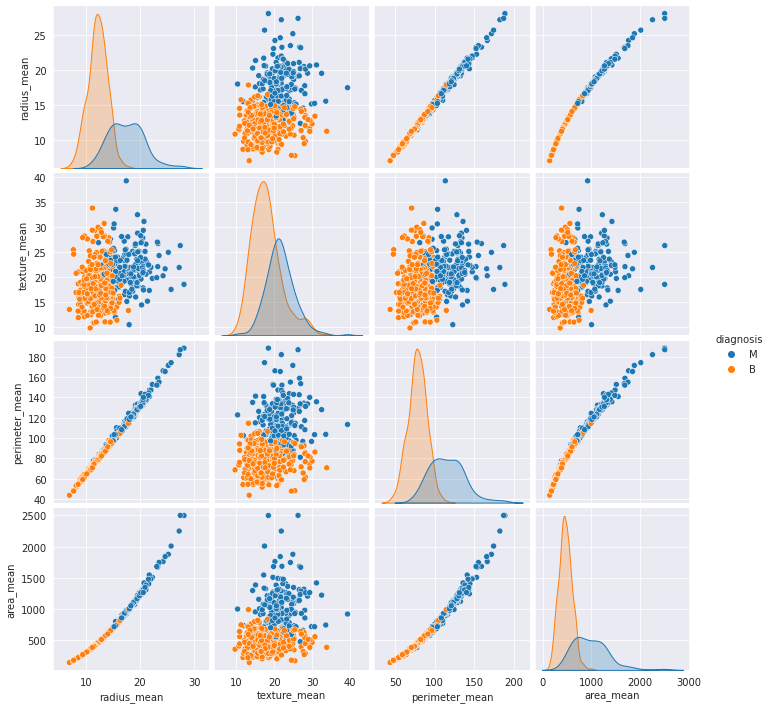

In [ ]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(bc_data[cols], hue="diagnosis")
plt.show()

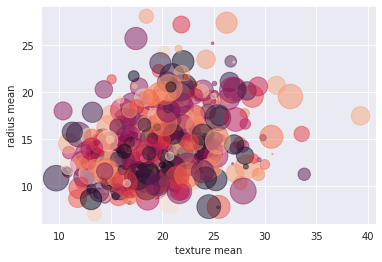

In [ ]:
size = len(bc_data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(bc_data['texture_mean'], bc_data['radius_mean'], s=area, c=colors, alpha=0.5);

## Data Segregation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
bc_data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## 

1. Creating one hot vectore for the diagnosis variable

In [ ]:
labelencoder_Y = LabelEncoder()
bc_data.diagnosis = labelencoder_Y.fit_transform(bc_data.diagnosis)

In [ ]:
bc_data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
print(bc_data.diagnosis.value_counts())
print("\n", bc_data.diagnosis.value_counts().sum())

0    357
1    212
Name: diagnosis, dtype: int64

 569


In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
bc_data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


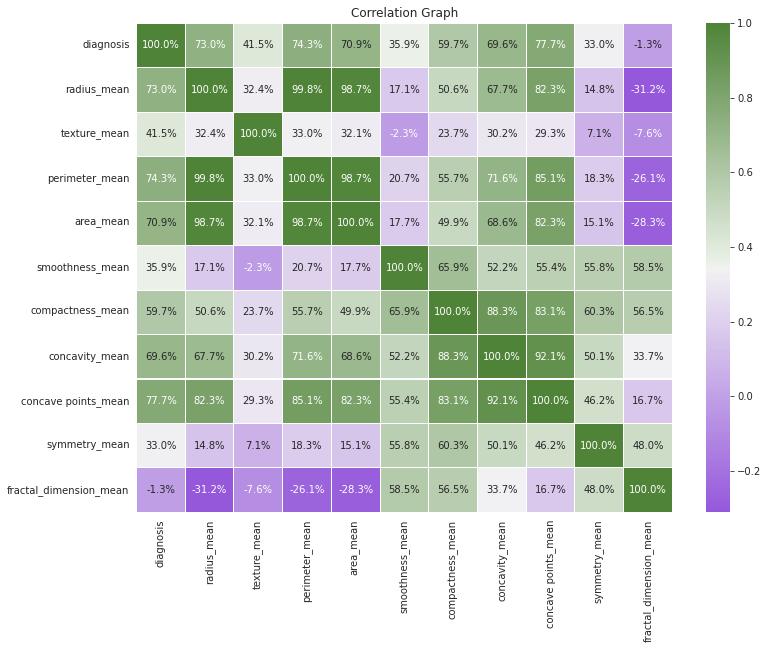

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 1200, as_cmap=True)
sns.heatmap(bc_data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [ ]:
plt.figure(figsize=(15, 10))


fig = px.imshow(bc_data[cols].corr());
fig.show()

<Figure size 1080x720 with 0 Axes>

# Models

### Training and Testing Data set

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

## ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
bc_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
prediction_feature = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
targeted_feature = 'diagnosis'

len(prediction_feature)

30

In [ ]:
X = bc_data[prediction_feature]
print(X.shape)
#print(X.values)

(569, 30)


In [ ]:
y = bc_data.diagnosis
#y
print(y.shape)

(569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

#print(X_train)
# print(X_test)
print(X_train.shape)
print(X_test.shape)

(381, 30)
(188, 30)


In [ ]:
# Scale the data to keep all the values in the same magnitude of 0 -1 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using All Features

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

In [ ]:
models_list = {
  "LogisticRegression" :  LogisticRegression(),
  "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
  "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
  "SVC" :  SVC(probability=True,kernel='linear'),
}

# print(models_list)

In [ ]:
X_test.shape

(188, 30)

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test)
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))            
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.96      0.95      0.95        73

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       115
           1       0.97      0.92      0.94        73

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.94      0.89      0.92        73

    accuracy            

# Feature Selection

## 1. PCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=10)
pca.fit(X_train)
#PCA(n_components=4)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(np.sum(pca.explained_variance_ratio_))

X_train_pca= pca.transform(X_train)
X_test_pca= pca.transform(X_test)

[0.43653494 0.19555986 0.09851384 0.0644592  0.05671248 0.03868288
 0.02187759 0.01592056 0.01299675 0.01109644]
[70.6370605  47.27842253 33.55611963 27.14348338 25.46023716 21.02725266
 15.81331124 13.48970009 12.18822746 11.26198467]
0.9523545447248644


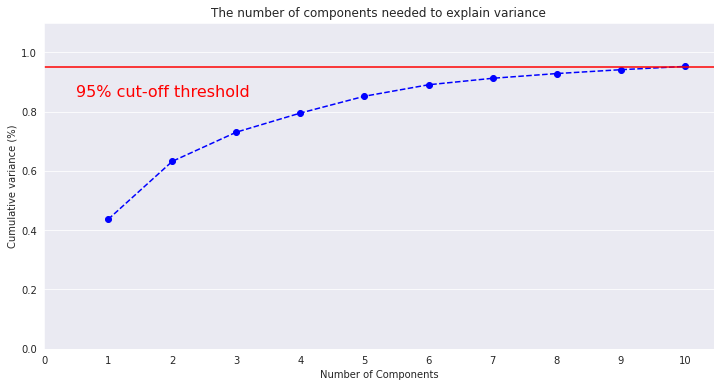

In [ ]:
pca = PCA(10).fit(X_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### PCA Observations

1. Using only 10 components of PCA out of 30 is able to explain the data with 95 %
2. That means true dimesion of the data is only 10

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

In [ ]:
models_list = {
  "LogisticRegression" :  LogisticRegression(),
  "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
  "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
  "SVC" :  SVC(probability=True,kernel='linear'),
}

# print(models_list)

In [ ]:
print(list(models_list.keys()))
print(list(models_list.values()))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC(kernel='linear', probability=True)]


In [ ]:
# Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_building(model, X_train_pca, X_test_pca, y_train, y_test )
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       0.97      0.96      0.97        73

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.94      0.89      0.92        73

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       115
           1       0.87      0.90      0.89        73

    accuracy            

## 2. L1 regularization using LogistcRegression 

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistic_l1 = LogisticRegression(penalty='l1',solver='liblinear')
Logistic_l1.fit(X_train,y_train)
Logistic_l1.coef_

array([[ 0.00000000e+00,  5.98887756e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.43467139e+00,  0.00000000e+00,
         0.00000000e+00,  1.70422373e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.57162841e-01,
        -7.79715332e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.54754847e-03,  0.00000000e+00,
         1.50414802e+00,  0.00000000e+00,  5.14686224e+00,
         2.37719161e-01,  0.00000000e+00,  7.54386951e-01,
         1.20820942e+00,  5.08502900e-01,  0.00000000e+00]])

In [ ]:
# Removing the weights that have zero weights in the coefficients of the L1_Logistic
binary_array =(np.abs(Logistic_l1.coef_)>0).flatten()
print(binary_array)
X_train_l1 = X_train[:,binary_array]
X_test_l1 = X_test[:,binary_array]
print(X_train_l1.shape)
print(X_test_l1.shape)

[False  True False False False False False  True False False  True False
 False False  True  True False False False  True False  True False  True
  True False  True  True  True False]
(381, 12)
(188, 12)


In [ ]:
a= list(bc_data.columns)
for i,j in enumerate(binary_array):
  if j ==True:
    print(a[i])

diagnosis
compactness_mean
symmetry_mean
perimeter_se
area_se
concave points_se
fractal_dimension_se
texture_worst
perimeter_worst
smoothness_worst
compactness_worst
concavity_worst


In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_building(model, X_train_l1, X_test_l1, y_train, y_test )
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(381, 30)
(381,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(188, 30)
(188,)


### L1 Regularization Observation

1. PCA gave the true dimesion of  data which is 3, using l1 panalyty we drove the wegiths to zero to see which features are important.

## 3. RFE

In [ ]:
def model_building2(model, X_train, X_test, y_train, y_test):
    """
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    cv = StratifiedKFold(5)
    visualizer = RFECV(model, cv=cv, scoring='f1_weighted')
    visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
    visualizer.show()           # Finalize and render the figure
    
    score = visualizer.score(X_train, y_train)
    predictions = visualizer.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_building2(model, X_train, X_test, y_train, y_test )
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

NameError: ignored

# Feature Selection using Genetic Algorithms

In [ ]:
! pip install sklearn-genetic

In [ ]:
from genetic_selection import GeneticSelectionCV

In [ ]:
def model_building3(model, X_train, X_test, y_train, y_test):
    """
    return ('score', 'accuracy_score', 'predictions' )
    """
    Genetic_Algorithm = GeneticSelectionCV(
    model, cv=5, verbose=2,
    scoring="accuracy", max_features=30,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
    Genetic_Algorithm.fit(X_train, y_train)
    print("Number of Features are ",Genetic_Algorithm.transform(X_train).shape[1])
    print(Genetic_Algorithm.support_)

    
    score = Genetic_Algorithm.score(X_train, y_train)
    predictions = Genetic_Algorithm.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    return (score, accuracy, predictions)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 30)
(188, 30)
(381,)
(188,)


In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_building3(model, X_train, X_test, y_train, y_test )
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

Selecting features with genetic algorithm.
gen	nevals	avg                      	std                    	min                    	max                      
0  	100   	[ 0.93086637 13.87      ]	[0.09308935 9.43997352]	[0.62727273 1.        ]	[ 0.98427888 30.        ]
1  	69    	[ 0.97464252 19.15      ]	[0.00939602 6.23598428]	[0.93171565 4.        ]	[ 0.98684211 30.        ]
2  	59    	[ 0.9790499 21.09     ]  	[0.005284   4.29905804]	[ 0.94483937 11.        ]	[ 0.98684211 30.        ]
3  	54    	[ 0.98112679 21.83      ]	[0.0052853  3.19704551]	[ 0.95266576 11.        ]	[ 0.98684211 29.        ]
4  	57    	[ 0.98270301 22.37      ]	[0.00319891 2.62547139]	[ 0.97368421 17.        ]	[ 0.98684211 27.        ]
5  	52    	[ 0.98388688 22.1       ]	[0.00333402 2.80178515]	[ 0.96578947 16.        ]	[ 0.98947368 27.        ]
6  	69    	[ 0.98230895 21.7       ]	[0.00750145 2.08566536]	[ 0.94747095 17.        ]	[ 0.99210526 27.        ]
7  	66    	[ 0.98398872 21.84      ]	[0.00611325 1.80399557

In [ ]:
from sklearn.metrics import *
mcc = make_scorer(matthews_corrcoef)
estimator = LogisticRegression(solver = "liblinear", C = 6, tol = 1, fit_intercept = True)

from sklearn.model_selection import *
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 2, n_splits = 10)
for i in range(2,11):
  
  selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  selector = selector.fit(D[allfeats], y)
  genfeats = D[allfeats].columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats:  ", genfeats)

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

### Implementation

In [ ]:
plt.figure(figsize=(10, 2))
# plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):

#    up
#     plt.xlabel("Negative Positive")
#     plt.ylabel("True Positive")

    
    
    # Show The Metrics Graph    
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)

In [ ]:
df_pred

In [ ]:
df_pred.sort_values('score', ascending=False)
# df_pred.sort_values('accuracy_score', ascending=False)

In [ ]:
df_pred.sort_values('score', ascending=False)
# df_pred.sort_values('accuracy_score', ascending=False)

## K-Fold

In [ ]:
len(data)
# print(len(X))

In [ ]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

In [ ]:
def cross_val_scorring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )